In [43]:
import pandas as pd
import statsmodels.api as sm
import math as m

In [44]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name=1)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [45]:
df = df.drop(columns = ['ID', 'ZIP Code'] )
df.drop_duplicates(inplace=True)
df.shape

(4987, 12)

In [46]:
Y = df['Personal Loan']
X = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']]

In [47]:
X1 = sm.add_constant(X)
Logistic = sm.Logit(Y,X1)

In [48]:
result = Logistic.fit()

Optimization terminated successfully.
         Current function value: 0.128720
         Iterations 9


In [49]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 4987
Model:                          Logit   Df Residuals:                     4975
Method:                           MLE   Df Model:                           11
Date:                Wed, 05 Aug 2020   Pseudo R-squ.:                  0.5936
Time:                        17:23:52   Log-Likelihood:                -641.93
converged:                       True   LL-Null:                       -1579.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1727      1.645     -7.399      0.000     -15.397      -8.948
Age                   -0.0541      0.061     -0.882      0.378      -0.174       0.066
Experience             0.0642      0.061      1.054      0.292      -0.055       0.184
Income                 0.0545      0.003     20.822      0.000       0.049       0.060
Family                 0.6947      0.074      9.348      0.000       0.549       0.840
CCAvg                  0.1236      0.040      3.117      0.002       0.046       0.201
Education              1.7363      0.115     15.091      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.848      0.396      -0.001       0.002
Securities Account    -0.9371      0.286     -3.280      0.001      -1.497      -0.377
CD Account             3.8181      0.324     11.788      0.000       3.183       4.453
Online                -0.6724      0.157     -4.280      0.000      -0.980      -0.364
CreditCard            -1.1181      0.205     -5.454      0.000      -1.520      -0.716
======================================================================================
"""

# Inference
When a bank wants to offer a loan, the following factors are highly significant:
1. Annual income of the customer
2. Family size of the customer
3. Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
4. Does the customer have a certificate of deposit (CD) account with the bank?
5. Does the customer use internet banking facilities?
6. Does the customer use a credit card issued by UniversalBank?

The following factors are also significant to some extent:
1. Avg. spending on credit cards per month
2. Does the customer have a securities account with the bank?



In [50]:
dfa = pd.read_csv('H:/Study/AI-ML Assignments/Day07/general_data.csv')
dfa.shape

(4410, 24)

In [51]:
dfa.dropna(inplace=True)
dfa.shape

(4382, 24)

In [52]:
dfa.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [53]:
dfa = dfa.drop(columns = ['EmployeeID', 'EmployeeCount', 'Over18', 'StandardHours', ])

In [54]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfa['Attrition'] = le.fit_transform(dfa['Attrition'])
dfa['BusinessTravel'] = le.fit_transform(dfa['BusinessTravel'])
dfa['EducationField'] = le.fit_transform(dfa['EducationField'])
dfa['Gender'] = le.fit_transform(dfa['Gender'])
dfa['Department'] = le.fit_transform(dfa['Department'])
dfa['MaritalStatus'] = le.fit_transform(dfa['MaritalStatus'])
dfa['JobRole'] = le.fit_transform(dfa['JobRole'])

In [55]:
Y1 = dfa['Attrition']
X2 = dfa.drop(columns = ['Attrition'])

In [56]:
X3 = sm.add_constant(X2)
Logistic1 = sm.Logit(Y1,X3)

In [57]:
res = Logistic1.fit()

Optimization terminated successfully.
         Current function value: 0.392916
         Iterations 7


In [58]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4382
Model:                          Logit   Df Residuals:                     4362
Method:                           MLE   Df Model:                           19
Date:                Wed, 05 Aug 2020   Pseudo R-squ.:                  0.1093
Time:                        17:23:52   Log-Likelihood:                -1721.8
converged:                       True   LL-Null:                       -1933.1
Covariance Type:            nonrobust   LLR p-value:                 8.681e-78
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0270      0.414      0.065      0.948      -0.785       0.839
Age                        -0.0307      0.007     -4.478      0.000      -0.044      -0.017
BusinessTravel             -0.0137      0.066     -0.209      0.834      -0.143       0.115
Department                 -0.2229      0.082     -2.735      0.006      -0.383      -0.063
DistanceFromHome           -0.0012      0.005     -0.231      0.818      -0.012       0.009
Education                  -0.0664      0.043     -1.555      0.120      -0.150       0.017
EducationField             -0.0954      0.034     -2.849      0.004      -0.161      -0.030
Gender                      0.0855      0.090      0.952      0.341      -0.091       0.262
JobLevel                   -0.0285      0.040     -0.716      0.474      -0.107       0.050
JobRole                     0.0400      0.018      2.226      0.026       0.005       0.075
MaritalStatus               0.5835      0.063      9.212      0.000       0.459       0.708
MonthlyIncome           -1.815e-06   9.57e-07     -1.897      0.058   -3.69e-06    6.01e-08
NumCompaniesWorked          0.1174      0.018      6.390      0.000       0.081       0.153
PercentSalaryHike           0.0126      0.012      1.067      0.286      -0.011       0.036
StockOptionLevel           -0.0675      0.052     -1.302      0.193      -0.169       0.034
TotalWorkingYears          -0.0584      0.012     -4.873      0.000      -0.082      -0.035
TrainingTimesLastYear      -0.1443      0.035     -4.097      0.000      -0.213      -0.075
YearsAtCompany              0.0132      0.018      0.718      0.473      -0.023       0.049
YearsSinceLastPromotion     0.1328      0.020      6.479      0.000       0.093       0.173
YearsWithCurrManager       -0.1394      0.022     -6.288      0.000      -0.183      -0.096
===========================================================================================
"""

# Inference

The following factors highly affect attrition in employees:
1. Age of the employee
2. Marital status of the employee
3. Total number of companies the employee has worked for
4. Total number of years the employee has worked so far
5. Number of times training was conducted for this employee last year
6. Number of years since last promotion
7. Number of years under current manager

The following factors also affect attrition in employees:
1. Department in company
2. Field of education


# Linear Regression-

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
data = pd.read_excel('Linear Regression.xlsx')
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [61]:
data.shape

(21613, 5)

In [62]:
data.duplicated().sum()

266

In [63]:
data.drop_duplicates(inplace = True)

In [64]:
data.shape

(21347, 5)

In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21347.0,541986.883918,368564.096080,75000.0,323900.00,450500.00,648000.0,7700000.0
sqft_living,21347.0,2086.289502,919.716435,290.0,1430.00,1920.00,2550.0,13540.0
bedrooms,21347.0,3.374994,0.932089,0.0,3.00,3.00,4.0,33.0
bathrooms,21347.0,2.119408,0.769485,0.0,1.75,2.25,2.5,8.0
floors,21347.0,1.495058,0.539468,1.0,1.00,1.50,2.0,3.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002874386C588>,
      dtype=object)

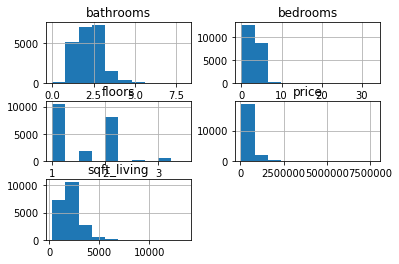

In [66]:
# EDA
data.hist()

In [67]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.701635,0.307048,0.524726,0.256003
sqft_living,0.701635,1.000000,0.574542,0.753606,0.352400
bedrooms,0.307048,0.574542,1.000000,0.513841,0.173016
bathrooms,0.524726,0.753606,0.513841,1.000000,0.497726
floors,0.256003,0.352400,0.173016,0.497726,1.000000


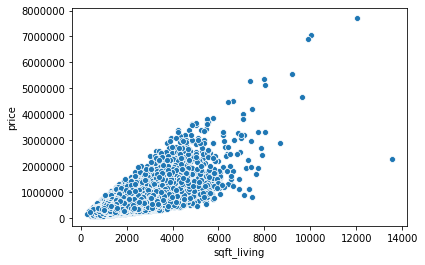

In [68]:
sns.scatterplot(data['sqft_living'], data['price'])

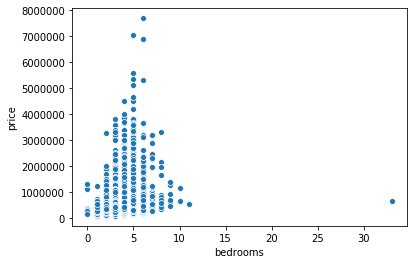

In [69]:
sns.scatterplot(data['bedrooms'], data['price'])

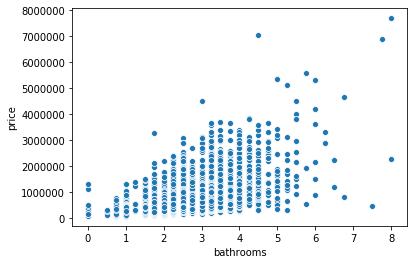

In [70]:
sns.scatterplot(data['bathrooms'], data['price'])

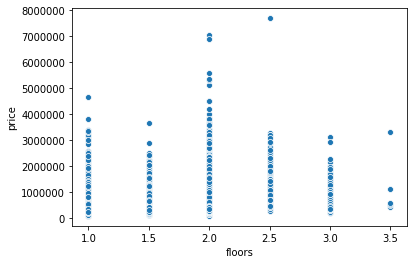

In [71]:
sns.scatterplot(data['floors'], data['price'])

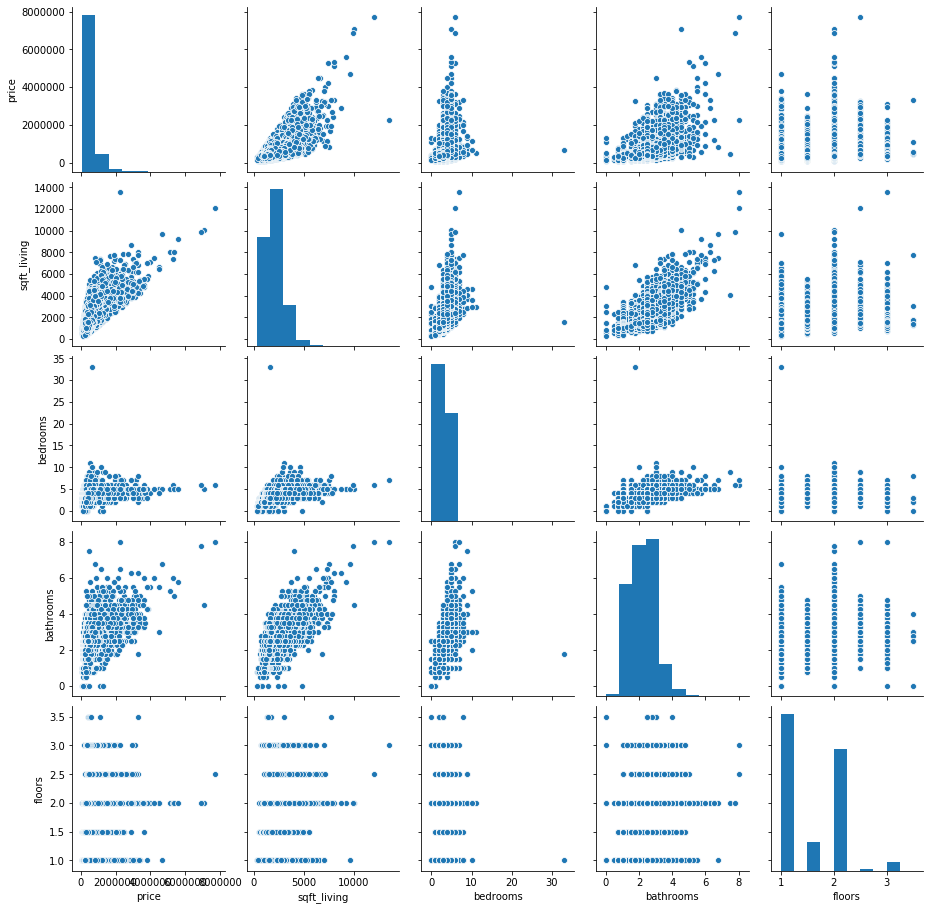

In [72]:
sns.pairplot(data)

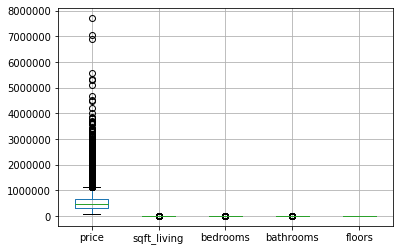

In [73]:
data.boxplot()

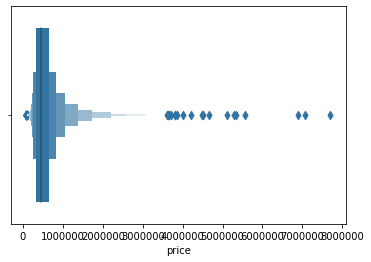

In [74]:
sns.boxenplot(data['price'])

# Price and Sqft_living

In [108]:
a = data.iloc[:, :1]
b = data.iloc[:,1:2]

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [76]:
from sklearn.model_selection import train_test_split
b_train, b_test, a_train1, a_test1 = train_test_split(b ,a, test_size = 0.2, random_state = 2)

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [109]:
lin_reg.fit(b_train, a_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lin_reg.coef_

array([[276.88043291]])

In [111]:
lin_reg.intercept_

array([-35727.90104285])

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
apred1 = lin_reg.predict(b_test)

In [83]:
RMSE = np.sqrt(mean_squared_error(a_test1, apred1))
r_square = r2_score(a_test1, apred1)

print('The R^2 value is:', r_square)
print('The RMSE value is:', RMSE)

The R^2 value is: 0.5029310605813945
The RMSE value is: 272082.4248082161


# price and bedrooms

In [85]:
c = data.iloc[:,2:3]

In [86]:
c_train, c_test, a_train2, a_test2 = train_test_split(c ,a, test_size = 0.2, random_state = 2)

In [87]:
lin_reg.fit(c_train, a_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lin_reg.coef_

array([[126220.5966624]])

In [89]:
lin_reg.intercept_

array([115856.32111607])

In [90]:
apred2 = lin_reg.predict(c_test)

In [91]:
RMSE2 = np.sqrt(mean_squared_error(a_test2,apred2))
r_square2 = r2_score(a_test2, apred2)

print('The R^2 value is:', r_square2)
print('The RMSE value is:', RMSE2)

The R^2 value is: 0.0717026763184081
The RMSE value is: 371822.5504955901


# price and bathrooms

In [92]:
d = data.iloc[:,3:4]

In [104]:
d_train, d_test, a_train3, a_test3 = train_test_split(d ,a, test_size = 0.2, random_state = 2)
lin_reg.fit(d_train, a_train3)
print('coeff:',lin_reg.coef_)
print('int:', lin_reg.intercept_)
apred3 = lin_reg.predict(d_test)
RMSE3 = np.sqrt(mean_squared_error(a_test3,apred3))
r_square3 = r2_score(a_test3, apred3)

print('The R^2 value is:', r_square3)
print('The RMSE value is:', RMSE3)

coeff: [[250995.43439352]]
int: [9112.15287223]
The R^2 value is: 0.2504947684323794
The RMSE value is: 334102.33483877813


# price and floors

In [94]:
e = data.iloc[:,4:]

In [105]:
e_train, e_test, a_train4, a_test4 = train_test_split(e ,a, test_size = 0.2, random_state = 2)
lin_reg.fit(e_train, a_train4)
print('coeff:',lin_reg.coef_)
print('int:', lin_reg.intercept_)
apred4 = lin_reg.predict(e_test)
RMSEe = np.sqrt(mean_squared_error(a_test4,apred4))
r_squaree = r2_score(a_test4, apred4)

print('The R^2 value is:', r_squaree)
print('The RMSE value is:', RMSEe)

coeff: [[179992.79319053]]
int: [272454.66991596]
The R^2 value is: 0.046817614920313555
The RMSE value is: 376773.3532398646


# Multiple regression

In [97]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [98]:
i = data.iloc[:, 1:]
j = data.iloc[:, :1]

In [99]:
i_train, i_test, j_train, j_test = train_test_split(i, j, test_size = 0.25, random_state = 2)

In [100]:
mul_reg = LinearRegression()

In [101]:
mul_reg.fit(i_train, j_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
jpred = mul_reg.predict(i_test)

In [103]:
print('The R-square:', r2_score(j_test,jpred))
print('RMSE value:', np.sqrt(mean_squared_error(j_test, jpred)))
print(mul_reg.coef_)
print(mul_reg.intercept_)

The R-square: 0.5169156993215529
RMSE value: 270832.4463853248
[[   299.2761186  -59540.73701592  16051.95783631   2457.78031534]]
[79812.2930756]


In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21347.0,541986.883918,368564.096080,75000.0,323900.00,450500.00,648000.0,7700000.0
sqft_living,21347.0,2086.289502,919.716435,290.0,1430.00,1920.00,2550.0,13540.0
bedrooms,21347.0,3.374994,0.932089,0.0,3.00,3.00,4.0,33.0
bathrooms,21347.0,2.119408,0.769485,0.0,1.75,2.25,2.5,8.0
floors,21347.0,1.495058,0.539468,1.0,1.00,1.50,2.0,3.5
